In [47]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy.optimize import minimize
import matplotlib.ticker as mticker

In [64]:
inicio = dt.date(2015, 1, 1)
final = dt.date(2023, 12, 31)

In [65]:
lista_acoes = []

acoes = list(pd.read_excel('carteirainside.xlsx')['Ativo'])
lista_acoes = [acao + ".SA" for acao in acoes]

In [66]:
precos = yf.download(tickers=lista_acoes, start=inicio, end=final)['Adj Close']
precos

[*********************100%%**********************]  43 of 43 completed


Ticker,AGRO3.SA,ALOS3.SA,ALPA4.SA,ALUP11.SA,ARZZ3.SA,AURE3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,...,NGRD3.SA,OPCT3.SA,PETR4.SA,SAPR11.SA,SBSP3.SA,SMTO3.SA,SUZB3.SA,TGMA3.SA,TOTS3.SA,VALE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,4.305274,NaN,4.518842,9.271070,20.398832,NaN,6.270601,8.235688,14.849439,7.181162,...,NaN,NaN,3.089933,NaN,13.356697,9.347707,17.277536,10.806689,10.326152,12.060667
2015-01-05,4.330161,NaN,4.395835,8.868443,19.759644,NaN,6.140485,8.252676,14.404204,6.840284,...,NaN,NaN,2.825836,NaN,13.356697,8.883892,17.277536,10.103254,10.008865,11.879301
2015-01-06,4.399841,NaN,4.356992,9.064458,19.372971,NaN,6.226307,8.524159,15.015796,6.741807,...,NaN,NaN,2.733402,NaN,13.316944,8.430268,17.277536,9.648090,9.382952,12.355378
2015-01-07,4.399841,NaN,4.305201,9.355833,19.570253,NaN,6.500388,8.862917,14.776049,7.188737,...,NaN,NaN,2.862149,NaN,13.595209,8.460851,17.277536,9.765330,9.316609,12.808791
2015-01-08,4.330161,NaN,4.369940,9.504171,19.475559,NaN,6.522531,8.908564,14.732014,7.158436,...,NaN,NaN,3.047017,NaN,13.642913,8.537301,17.277536,9.641194,9.532941,12.944808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,25.860001,25.173948,9.130000,28.247524,66.160004,12.915058,26.200119,16.113083,31.938066,7.390000,...,1.253356,6.29,32.968971,27.701874,72.944908,28.784426,54.450001,26.394823,33.349998,73.674408
2023-12-22,25.860001,24.984671,9.500000,28.396147,66.650002,12.915058,26.272509,16.163069,32.140388,7.380000,...,1.253356,6.47,33.286068,27.816145,73.573746,28.833748,54.939999,26.375368,32.849998,73.119240
2023-12-26,26.250000,25.202339,9.750000,28.489037,66.400002,12.905370,26.513807,16.211081,32.381248,7.500000,...,1.253356,6.39,33.820602,27.378098,72.856483,28.804155,55.220001,26.608864,33.529999,73.377686


In [67]:
precos.isna().sum()

Ticker
AGRO3.SA        0
ALOS3.SA     2187
ALPA4.SA        0
ALUP11.SA       0
ARZZ3.SA        0
AURE3.SA     1796
BBAS3.SA        0
BBDC4.SA        0
BBSE3.SA        0
BEEF3.SA        0
BMOB3.SA     1518
BRFS3.SA        0
BRIT3.SA     1634
BRSR6.SA        0
CMIG4.SA        0
CMIN3.SA     1523
CSAN3.SA        0
CSMG3.SA        0
CVCB3.SA        0
ELET6.SA        0
ESPA3.SA     1513
EVEN3.SA        0
FLRY3.SA        0
GMAT3.SA     1438
GOAU4.SA        0
HAPV3.SA      828
INTB3.SA     1515
ITSA4.SA        0
JBSS3.SA        0
LAVV3.SA     1412
LEVE3.SA        0
MLAS3.SA     1627
MRVE3.SA        0
NGRD3.SA     1485
OPCT3.SA     1519
PETR4.SA        0
SAPR11.SA     745
SBSP3.SA        0
SMTO3.SA        0
SUZB3.SA        0
TGMA3.SA        0
TOTS3.SA        0
VALE3.SA        0
dtype: int64

In [68]:
precos = precos.dropna(axis=1)

In [69]:
precos.isna().sum()

Ticker
AGRO3.SA     0
ALPA4.SA     0
ALUP11.SA    0
ARZZ3.SA     0
BBAS3.SA     0
BBDC4.SA     0
BBSE3.SA     0
BEEF3.SA     0
BRFS3.SA     0
BRSR6.SA     0
CMIG4.SA     0
CSAN3.SA     0
CSMG3.SA     0
CVCB3.SA     0
ELET6.SA     0
EVEN3.SA     0
FLRY3.SA     0
GOAU4.SA     0
ITSA4.SA     0
JBSS3.SA     0
LEVE3.SA     0
MRVE3.SA     0
PETR4.SA     0
SBSP3.SA     0
SMTO3.SA     0
SUZB3.SA     0
TGMA3.SA     0
TOTS3.SA     0
VALE3.SA     0
dtype: int64

In [70]:
retornos = precos.pct_change().apply(lambda x: np.log(1+x)).dropna() # Retorno logarítmico
media_retornos = retornos.mean()
matriz_cov = retornos.cov()

print(media_retornos, matriz_cov)

Ticker
AGRO3.SA     0.000817
ALPA4.SA     0.000361
ALUP11.SA    0.000514
ARZZ3.SA     0.000515
BBAS3.SA     0.000649
BBDC4.SA     0.000309
BBSE3.SA     0.000349
BEEF3.SA     0.000018
BRFS3.SA    -0.000635
BRSR6.SA     0.000267
CMIG4.SA     0.000468
CSAN3.SA     0.000581
CSMG3.SA     0.000697
CVCB3.SA    -0.000519
ELET6.SA     0.000948
EVEN3.SA     0.000314
FLRY3.SA     0.000538
GOAU4.SA     0.000240
ITSA4.SA     0.000517
JBSS3.SA     0.000531
LEVE3.SA     0.000567
MRVE3.SA     0.000431
PETR4.SA     0.001070
SBSP3.SA     0.000766
SMTO3.SA     0.000505
SUZB3.SA     0.000523
TGMA3.SA     0.000418
TOTS3.SA     0.000529
VALE3.SA     0.000811
dtype: float64 Ticker     AGRO3.SA  ALPA4.SA  ALUP11.SA  ARZZ3.SA  BBAS3.SA  BBDC4.SA  \
Ticker                                                                   
AGRO3.SA   0.000311  0.000090   0.000060  0.000100  0.000119  0.000089   
ALPA4.SA   0.000090  0.000802   0.000144  0.000313  0.000242  0.000227   
ALUP11.SA  0.000060  0.000144   0.000268  0.

In [71]:
precos

Ticker,AGRO3.SA,ALPA4.SA,ALUP11.SA,ARZZ3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BRFS3.SA,BRSR6.SA,...,JBSS3.SA,LEVE3.SA,MRVE3.SA,PETR4.SA,SBSP3.SA,SMTO3.SA,SUZB3.SA,TGMA3.SA,TOTS3.SA,VALE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,4.305274,4.518842,9.271070,20.398832,6.270601,8.235688,14.849439,7.181162,57.139931,7.103365,...,7.596037,9.453587,4.288368,3.089933,13.356697,9.347707,17.277536,10.806689,10.326152,12.060667
2015-01-05,4.330161,4.395835,8.868443,19.759644,6.140485,8.252676,14.404204,6.840284,56.055576,7.053691,...,7.632037,9.363549,4.211260,2.825836,13.356697,8.883892,17.277536,10.103254,10.008865,11.879301
2015-01-06,4.399841,4.356992,9.064458,19.372971,6.226307,8.524159,15.015796,6.741807,56.560997,6.502311,...,7.452037,9.255510,4.323956,2.733402,13.316944,8.430268,17.277536,9.648090,9.382952,12.355378
2015-01-07,4.399841,4.305201,9.355833,19.570253,6.500388,8.862917,14.776049,7.188737,59.088097,6.854996,...,7.660840,9.372554,4.418859,2.862149,13.595209,8.460851,17.277536,9.765330,9.316609,12.808791
2015-01-08,4.330161,4.369940,9.504171,19.475559,6.522531,8.908564,14.732014,7.158436,58.031307,6.656299,...,7.725638,9.494102,4.472241,3.047017,13.642913,8.537301,17.277536,9.641194,9.532941,12.944808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,25.860001,9.130000,28.247524,66.160004,26.200119,16.113083,31.938066,7.390000,13.980000,12.497330,...,24.820000,33.122234,10.690000,32.968971,72.944908,28.784426,54.450001,26.394823,33.349998,73.674408
2023-12-22,25.860001,9.500000,28.396147,66.650002,26.272509,16.163069,32.140388,7.380000,13.800000,12.584317,...,24.870001,33.139481,10.720000,33.286068,73.573746,28.833748,54.939999,26.375368,32.849998,73.119240
2023-12-26,26.250000,9.750000,28.489037,66.400002,26.513807,16.211081,32.381248,7.500000,13.730000,12.622979,...,25.000000,33.358192,10.750000,33.820602,72.856483,28.804155,55.220001,26.608864,33.529999,73.377686


In [96]:
# Criar nova lista de ações apenas com os tickers que permaneceram em preços
nova_lista_acoes = list(precos.columns)
nova_lista_acoes

['AGRO3.SA',
 'ALPA4.SA',
 'ALUP11.SA',
 'ARZZ3.SA',
 'BBAS3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BRFS3.SA',
 'BRSR6.SA',
 'CMIG4.SA',
 'CSAN3.SA',
 'CSMG3.SA',
 'CVCB3.SA',
 'ELET6.SA',
 'EVEN3.SA',
 'FLRY3.SA',
 'GOAU4.SA',
 'ITSA4.SA',
 'JBSS3.SA',
 'LEVE3.SA',
 'MRVE3.SA',
 'PETR4.SA',
 'SBSP3.SA',
 'SMTO3.SA',
 'SUZB3.SA',
 'TGMA3.SA',
 'TOTS3.SA',
 'VALE3.SA']

In [97]:
numero_carteiras = 100000
tabela_retornos_esperados = np.zeros(numero_carteiras) # Não é uma tabela, é uma série (vetor)
tabela_volatilidades_esperadas = np.zeros(numero_carteiras) # Não é uma tabela, é uma série (vetor)
tabela_sharpes = np.zeros(numero_carteiras) # Não é uma tabela, é uma série (vetor)
tabela_pesos = np.zeros((numero_carteiras, len(nova_lista_acoes))) # Aqui é tabela mesmo hehehe

for k in range(numero_carteiras):
    pesos = np.random.random(len(nova_lista_acoes))
    pesos = pesos/np.sum(pesos) # Normalização para 100%
    tabela_pesos[k, :] = pesos

    tabela_retornos_esperados[k] = np.sum(media_retornos * pesos * 252)

    tabela_volatilidades_esperadas[k] = np.sqrt(np.dot(pesos.T, np.dot(matriz_cov * 252, pesos)))
    
    tabela_sharpes[k] = tabela_retornos_esperados[k] / tabela_volatilidades_esperadas[k]

In [98]:
sharpe_maximo = tabela_sharpes.argmax()
sharpe_maximo

87563

In [99]:
tabela_pesos[sharpe_maximo]

array([0.07503461, 0.00048062, 0.04574029, 0.02312772, 0.01277252,
       0.0163324 , 0.06405094, 0.03067819, 0.00797596, 0.00544962,
       0.01604226, 0.04667656, 0.01117763, 0.00525985, 0.07529268,
       0.00964056, 0.05873117, 0.00741887, 0.0087132 , 0.05665399,
       0.03677989, 0.0093736 , 0.03733966, 0.05482634, 0.0262842 ,
       0.07606459, 0.06265343, 0.05428727, 0.06514139])

In [100]:
# Create the portfolio with the weights of the highest Sharpe ratio portfolio

df = pd.DataFrame({'Ativo': nova_lista_acoes, 'Peso': tabela_pesos[sharpe_maximo]})

# save df in xlsx file

df.to_excel('markovitz.xlsx')

In [101]:
# Retoma o retorno para aritmético exponencial

tabela_retornos_esperados_arit = np.exp(tabela_retornos_esperados) - 1

tabela_retornos_esperados_arit

array([0.12305495, 0.10858099, 0.13545628, ..., 0.12107041, 0.1083762 ,
       0.13198532])

In [102]:
eixo_y_fronteira_eficiente = np.linspace(tabela_retornos_esperados_arit.min(), tabela_retornos_esperados_arit.max(), 50)

def pegando_retorno(peso_teste):
    peso_teste = np.array(peso_teste)
    retorno = np.sum(media_retornos * peso_teste * 252)
    retorno = np.exp(retorno) - 1

    return retorno

def checando_soma_pesos(peso_teste):
    return np.sum(peso_teste) - 1

def pegando_vol(peso_teste):
    peso_teste = np.array(peso_teste)
    vol = np.sqrt(np.dot(peso_teste.T, np.dot(matriz_cov * 252, peso_teste)))
    return vol

peso_inicial = [1/len(nova_lista_acoes)] * len(nova_lista_acoes) # Isso vira uma carteira com pesos iguais
limites = tuple([(0,1) for ativo in nova_lista_acoes]) # Ativo tem peso 0 ou 1

eixo_x_fronteira_eficiente = []

for retorno_possivel in eixo_y_fronteira_eficiente:
    restricoes = ({'type': 'eq', 'fun': checando_soma_pesos},
                   {'type': 'eq', 'fun': lambda w: pegando_retorno(w) - retorno_possivel})
    
    result = minimize(pegando_vol, peso_inicial, bounds = limites, method='SLSQP', constraints = restricoes)
    eixo_x_fronteira_eficiente.append(result['fun'])

In [103]:
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.17143720236204932
       x: [ 2.896e-01  2.982e-17 ...  0.000e+00  4.305e-02]
     nit: 8
     jac: [ 1.921e-01  1.765e-01 ...  1.659e-01  1.918e-01]
    nfev: 240
    njev: 8

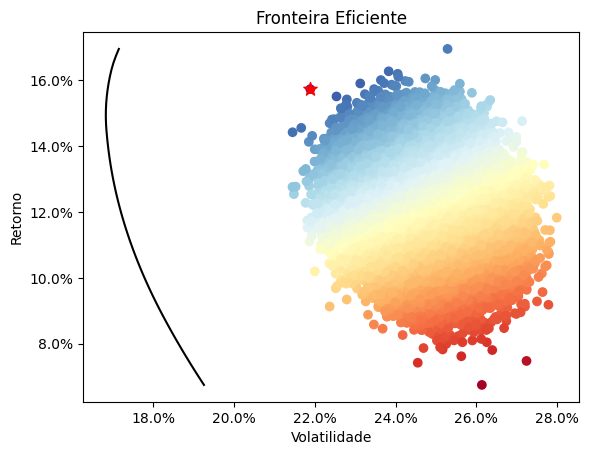

In [104]:
fig, ax = plt.subplots()

ax.scatter(tabela_volatilidades_esperadas, tabela_retornos_esperados_arit, c=tabela_sharpes, cmap='RdYlBu')

ax.set_xlabel('Volatilidade')
ax.set_ylabel('Retorno')
ax.set_title('Fronteira Eficiente')

ax.scatter(tabela_volatilidades_esperadas[sharpe_maximo], tabela_retornos_esperados_arit[sharpe_maximo], c='red', marker='*', s=100)

ax.plot(eixo_x_fronteira_eficiente, eixo_y_fronteira_eficiente, color='black')
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(mticker.PercentFormatter(1.0))

plt.show()